In [10]:
import numpy as np
import matplotlib.pyplot as plt

def bar_p(x): # implementing the density just for visualisation!
    return np.exp(-x[0]**2/10 - x[1]**2/10 - 2 * (x[1] - x[0]**2)**2) 
    
def q(x):
    return np.exp(- x[0]**2/2 - x[1]**2/2) / (2 * np.pi) 
    
def logbar_p(x):
    return - x[0]**2/10 - x[1]**2/10 - 2 * (x[1] - x[0]**2)**2
    
def loglik(y, x, sig): 
    H = [1, 0]
    return -(y - H @ x)**2/(2 * sig**2) - np.log(sig * np.sqrt(2 * np. pi))

def logq(x):
    return - x[0]**2/2 - x[1]**2/2 - np.log(2 * np.pi)
    
def ESS(w):
    return 1/np.sum(w**2)
    
y=1
sig = 0.05
N = 10000
rng = np.random.default_rng(25)
# sample from q
x = rng.normal(0, 1, (2, N)) # 2 x N matrix (2 dimensional, N samples)
# compute logW
logW = np.zeros(N) 
for i in range(N):
    logW[i] = (loglik(y, x[:, i], sig)) + logbar_p(x[:, i]) - logq(x[: , i])
# compute log_hat_W
log_hat_W = logW - np.max(logW)
w = np.exp(log_hat_W)/np.sum(np.exp(log_hat_W))
# compute mean estimate
mean = np.sum(w*x, axis=1)
# compute ESS
print("ESS: ", ESS(w))

ESS:  166.13314607029793


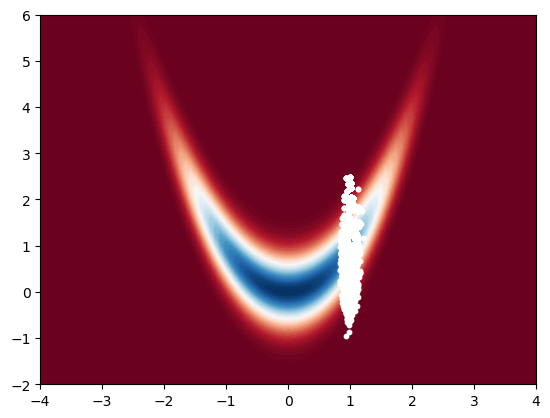

In [9]:
# resample N samples
x_resampled = np.zeros((2, N)) 
for i in range(N):
    x_resampled[:, i] = x[:, rng.choice(N, p=w)]
# rng.choice chooses an index from 0 to N-1 with probability w
# plot resampled samples
x_bb = np.linspace(-4, 4, 100)
y_bb = np.linspace(-2, 6, 100)
X_bb, Y_bb = np.meshgrid(x_bb, y_bb) 
Z_bb = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        Z_bb[i, j] = bar_p([X_bb[i, j], Y_bb[i, j]])
plt.contourf(X_bb, Y_bb, Z_bb, 100, cmap='RdBu') 
plt.scatter(x_resampled[0, :], x_resampled[1, :], s=10, c='white')
plt.show()